# Test Points as Pixels and Shade

In [1]:
import numpy as np
import imageio
from PIL import Image
import math
from numba import njit

TypeError: create_target_machine() got an unexpected keyword argument 'jitdebug'

In [3]:
class shade(object):
    def __init__(self, testFunction, bounds=(-1,1,-1,1), dpi=72, backgroundColor=(0,0,0)):
        self.testFunction = testFunction
        self.backgroundColor = backgroundColor
        self.dpi = dpi ## Is there a better way to do the dpi?
        self.xmin, self.xmax, self.ymin, self.ymax = bounds
        self.bounds = (self.xmin, self.xmax, self.ymin, self.ymax)
        self.width = math.ceil((self.xmax-self.xmin) * self.dpi)
        self.height = math.ceil((self.ymax-self.ymin) * self.dpi)
        self.pic = Image.new('RGB', (self.width, self.height), self.backgroundColor)
        self.pixels = self.pic.load()
        self.h = 0
        self.k = 0

    def _scale_to_plane(self, h, k):
        x = self.xmin + h * (self.xmax-self.xmin) / self.width
        y = self.ymax - k * (self.ymax-self.ymin) / self.height
        return x, y

    def fill(self):
        while self.h < self.width:
            while self.k < self.height:
                self.pixels[self.h,self.k] = self.testFunction(*self._scale_to_plane(self.h,self.k))
                self.k += 1
            self.h += 1
            self.k = 0

    def save_pic(self, path='Trash.png'):
        self.pic.save(path)

### Simple

In [4]:
def d(a,b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def simple(x, y):
    if d((x,y), (0,0)) <= 1:
        return (255, 255, 255)
    else:
        return (0,0,0)

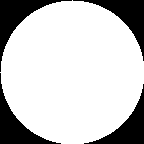

In [5]:
simple = shade(simple)
simple.fill()
simple.pic

### ALA

In [6]:
def lbda(a,b):
    return (a+np.sqrt(a**2+2*b))/2

def notToZero(a,b):
    if (np.linalg.matrix_power(np.array([[a,b],[1/2,0]]),10)>10).any():
        return True
    else:
        return False

def ala(a, b):
    if notToZero(a,b):
        return (255, 255, 255)
    else:
        return (0,0,0)

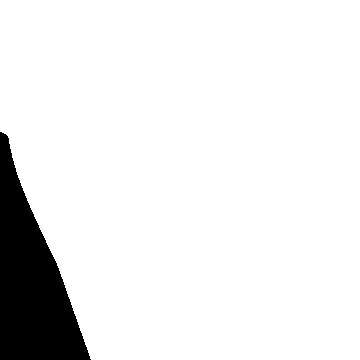

In [7]:
ALA = shade(ala, bounds=(0,5,0,5))
ALA.fill()
ALA.pic

### Mandelbrot

In [12]:
# @njit
def mandelbrotTest(x_0, y_0):
    x, y = x_0, y_0

    # Check for in the first bulb
    q = (x - 1/4)**2 + y**2
    if q * ( q + (x - 1/4)) <= y**2/4:
        return (0,0,0)

    # check for 2nd bulb
    if (x + 1)**2 + y**2 <= 1/16:
        return (0,0,0)

    # really outside
    if x**2 + y**2 >= 4:
        return (0,0,255)

    # iterations
    for i in range(100000):
        x, y = x**2 - y**2 + x_0, 2 * x * y + y_0
        if x**2 + y**2 >= 4:
            return mandelbrotColor(i + 1)
    return (0,0,0)


# @njit
def mandelbrotColor(i):
    if i == -1:
        return (0,0,0)
    red = max(20 * abs((i - 25.5) % 38.25 - 19.125) - 127.5, 0)
    green = max(20 * abs((i - 12.75) % 38.25 - 19.125) - 127.5, 0)
    blue = max(20 * abs(i % 38.25 - 19.125) - 127.5, 0)
    return (int(red), int(green), int(blue))

In [24]:
mand = shade(mandelbrotTest, dpi=72, bounds=(-2.25, 2.25, -2.25, 2.25))  #

In [25]:
mand.fill()

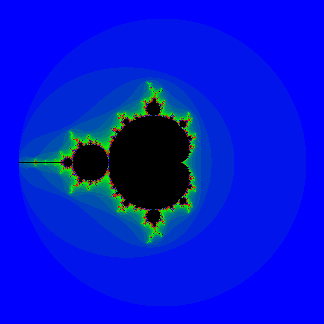

In [26]:
mand.pic

### Weird Lanscape

In [0]:
abs(x**y) < abs(y % x)
abs(x % y) < abs(x**y)
abs(y**x) < abs(y%x)
abs(x**x) < abs(x**y + y**x) and abs(y**y) > abs(x**y + y**x)

In [324]:
def cool(x, y):
    if y == 0 or x==0:
        return (255, 0 ,0)
    if abs(x % y) < abs(x**y) and abs(x**y) < abs(y % x):
        return (255,255,255)
    else:
        return (0,0,0)

In [326]:
new = shade(cool, dpi=100, bounds = (-10,10,-10,10))
new.fill()
new.pic

### Different

In [80]:
@njit
def diffTest(x_0, y_0):
    x, y = x_0, y_0

    # iterations
    for i in range(100000):
        x, y = x**2 - y**2, 2 * x * y - .8
        if x**2 + y**2 >= 10:
            return mandelbrotColor(i + 1)
    return (0,0,0)


In [81]:
diff = shade(diffTest, dpi=75, bounds=(-2.25, 2.25, -2.25, 2.25))  # bounds = (-.25,0,.75,1))   #

In [82]:
diff.fill()

In [83]:
diff.pic

## mand like

In [11]:
@njit
def mandLike(x_0, y_0):
    x, y = x_0, y_0

    # iterations
    for i in range(100000):
        x, y = x**x_0, y**y_0
        if x**2 + y**2 >= 10:
            return (255,255,255)  madLikeColor(i + 1)
    return (0,0,0)


@njit
def mandLikeColor(i):
    if i == -1:
        return (0,0,0)
    red = max(20 * abs((i - 25.5) % 38.25 - 19.125) - 127.5, 0)
    green = max(20 * abs((i - 12.75) % 38.25 - 19.125) - 127.5, 0)
    blue = max(20 * abs(i % 38.25 - 19.125) - 127.5, 0)
    return (int(red), int(green), int(blue))

SyntaxError: invalid syntax (<ipython-input-11-532ee8634d66>, line 9)

In [12]:
like = shade(mandLike, dpi=50, bounds = (-10,10,-10,10))
like.fill()

KeyboardInterrupt: 

In [10]:
like.pic